In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

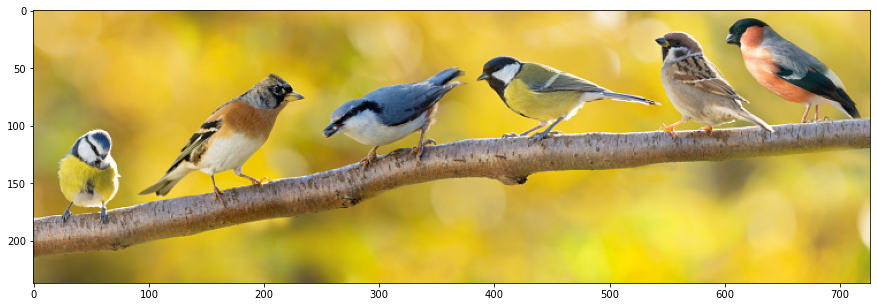

In [2]:
# Load image
img = cv2.imread('birds.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

In [3]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

In [4]:
# Cast the image to float
#img = np.float32(img)/255
#colors = np.float32(colors)/255
# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel =  list(img[r, c, :])
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        aList = []
        for g in range(4):
            a = img[r,c] - colors[g]
            b = np.sum(a**2)
            aList.append(b)

        min_index = np.argmin(aList)
            
        new_pixel = colors[min_index]  
        
        # Apply quantization
        quantized[r, c, :] = new_pixel
        
#quantized = (255*quantized).astype(np.uint8)

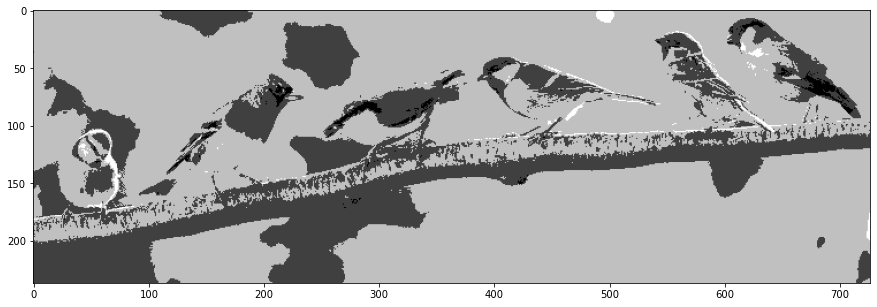

In [5]:
plt.imshow(quantized)

In [6]:
# Compute average quantization error
diff = img - quantized
avg_quant_error = np.mean(diff)
print(avg_quant_error)

113.22091828739575


In [7]:
#for each y from top to bottom do
#    for each x from left to right do
#        oldpixel := pixels[x][y]
#        newpixel := find_closest_palette_color(oldpixel)
#        pixels[x][y] := newpixel
#        quant_error := oldpixel - newpixel
#        pixels[x + 1][y    ] := pixels[x + 1][y    ] + quant_error × 7 / 16
#        pixels[x - 1][y + 1] := pixels[x - 1][y + 1] + quant_error × 3 / 16
#        pixels[x    ][y + 1] := pixels[x    ][y + 1] + quant_error × 5 / 16
#        pixels[x + 1][y + 1] := pixels[x + 1][y + 1] + quant_error × 1 / 16

In [8]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)
#dithering = np.float32(dithering)/255
#quantized = np.float32(quantized)/255

for r in range(1, rows-1):
    for c in range(1, cols-1):
    
        quant_error = img_tmp[r,c,:] - quantized[r,c,:]
        dithering[r,c+1,:]=quantized[r, c+1, :] + quant_error*7/16
        dithering[r+1,c-1,:]=quantized[r+1, c-1, :] + quant_error*3/16
        dithering[r+1,c,:]=quantized[r+1, c, :] + quant_error*5/16
        dithering[r+1,c+1,:]=quantized[r+1, c+1, :] + quant_error*1/16

#dithering = (255*dithering).astype(np.uint8)

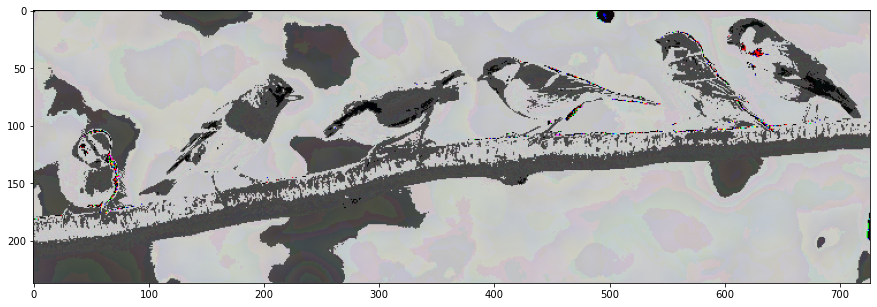

In [9]:
plt.imshow(dithering)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fe48d0968e0>)

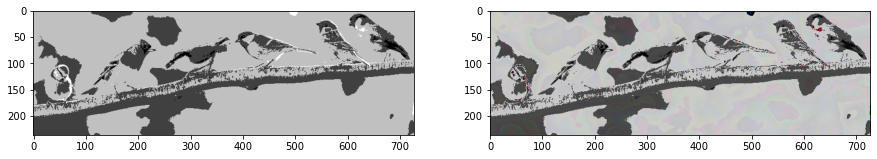

In [10]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized)   # optimally quantized
plt.subplot(122), plt.imshow(dithering)   # dithering

In [11]:
diff_2 = img - dithering
avg_dith_error = np.mean(diff_2)
print(avg_dith_error)

110.38536110675821
